<a href="https://colab.research.google.com/github/pydevcasts/MLHub/blob/master/azade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

"""
حل مسئله مسیریابی وسایل نقلیه با پهپاد (VRPD) از الگوریتم بهینه‌سازی کلونی مورچه‌ها (ACO) استفاده می‌کند. ابتدا با تولید تصادفی موقعیت‌ها و نیازهای مشتریان، یک ماتریس فاصله بین آنها محاسبه می‌شود. سپس، با استفاده از کلاس AntColony، الگوریتم ACO اجرا می‌شود که شامل مراحل ساخت مسیر، انتخاب مکان بعدی بر اساس فاکتورهای فیرومون و فاصله، و به‌روزرسانی ماتریس فیرومون است. در هر تکرار، مسیرها و هزینه‌های مختلف محاسبه می‌شن و بهترین مسیر و هزینه نهایی در انتها نمایش داده می‌شود. همچنین، مسیر بهینه بر روی یک نمودار بصری‌سازی می‌شود تا نتایج به‌طور واضح نمایش داده بشه.
"""

Iteration 1/100, Best Cost: 400.2112591739673
Iteration 2/100, Best Cost: 370.19492404513244
Iteration 3/100, Best Cost: 370.19492404513244
Iteration 4/100, Best Cost: 365.08895497093283
Iteration 5/100, Best Cost: 314.74803772911275
Iteration 6/100, Best Cost: 314.74803772911275
Iteration 7/100, Best Cost: 314.74803772911275
Iteration 8/100, Best Cost: 314.74803772911275
Iteration 9/100, Best Cost: 314.74803772911275
Iteration 10/100, Best Cost: 314.74803772911275
Iteration 11/100, Best Cost: 314.74803772911275
Iteration 12/100, Best Cost: 314.74803772911275
Iteration 13/100, Best Cost: 298.308791007893
Iteration 14/100, Best Cost: 298.308791007893
Iteration 15/100, Best Cost: 298.308791007893
Iteration 16/100, Best Cost: 298.308791007893
Iteration 17/100, Best Cost: 298.308791007893
Iteration 18/100, Best Cost: 298.308791007893
Iteration 19/100, Best Cost: 298.308791007893
Iteration 20/100, Best Cost: 298.308791007893
Iteration 21/100, Best Cost: 298.308791007893
Iteration 22/100, Be

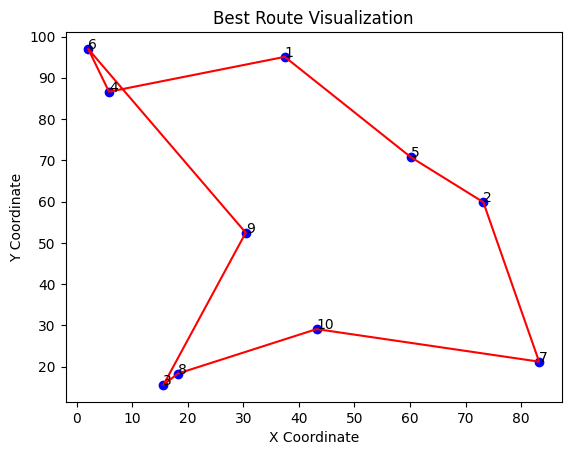

In [ ]:

import numpy as np
import random
import matplotlib.pyplot as plt

# Parameters
num_customers = 10
num_ants = 5
num_iterations = 100
alpha = 1  # pheromone importance
beta = 2   # distance importance
evaporation_rate = 0.5
q0 = 0.9   # exploration vs exploitation factor

# Generate random customer locations and demands
np.random.seed(42)
customer_locations = np.random.rand(num_customers, 2) * 100  # 100x100 grid
customer_demands = np.random.randint(1, 10, size=num_customers)  # Random demands

# Distance matrix
def calculate_distance_matrix(locations):
    num_locations = len(locations)
    distance_matrix = np.zeros((num_locations, num_locations))
    for i in range(num_locations):
        for j in range(num_locations):
            distance_matrix[i][j] = np.linalg.norm(locations[i] - locations[j])
    return distance_matrix

distance_matrix = calculate_distance_matrix(customer_locations)

# ACO Algorithm
class AntColony:
    def __init__(self, distance_matrix):
        self.distance_matrix = distance_matrix
        self.num_locations = len(distance_matrix)
        self.pheromone_matrix = np.ones((self.num_locations, self.num_locations))  # Initial pheromones

    def run(self):
        best_cost = float('inf')
        best_route = None

        for iteration in range(num_iterations):
            all_routes = []
            for ant in range(num_ants):
                route, cost = self.construct_solution()
                all_routes.append((route, cost))
                if cost < best_cost:
                    best_cost = cost
                    best_route = route

            self.update_pheromones(all_routes)
            print(f"Iteration {iteration + 1}/{num_iterations}, Best Cost: {best_cost}")

        return best_route, best_cost

    def construct_solution(self):
        route = []
        visited = set()
        current_location = 0  # Start from depot (0)
        total_cost = 0

        while len(visited) < self.num_locations:
            route.append(current_location)
            visited.add(current_location)
            next_location = self.select_next_location(current_location, visited)
            if next_location is not None:
                total_cost += self.distance_matrix[current_location][next_location]
                current_location = next_location
            else:
                break

        total_cost += self.distance_matrix[current_location][0]  # Return to depot
        route.append(0)  # Return to depot
        return route, total_cost

    def select_next_location(self, current_location, visited):
        probabilities = []
        for next_location in range(self.num_locations):
            if next_location not in visited:
                pheromone = self.pheromone_matrix[current_location][next_location] ** alpha
                distance = (1 / self.distance_matrix[current_location][next_location]) ** beta
                probabilities.append(pheromone * distance)
            else:
                probabilities.append(0)

        total = sum(probabilities)
        if total == 0:
            return None  # No unvisited locations

        probabilities = [p / total for p in probabilities]
        return np.random.choice(range(self.num_locations), p=probabilities)

    def update_pheromones(self, all_routes):
        self.pheromone_matrix *= (1 - evaporation_rate)  # Evaporate pheromones
        for route, cost in all_routes:
            for i in range(len(route) - 1):
                self.pheromone_matrix[route[i]][route[i + 1]] += 1 / cost  # Increase pheromones

# Running the ACO algorithm
aco = AntColony(distance_matrix)
best_route, best_cost = aco.run()

# Results
print("Best Route:", best_route)
print("Best Cost:", best_cost)

# Plotting the customer locations
plt.scatter(customer_locations[:, 0], customer_locations[:, 1], color='blue')
for i, txt in enumerate(range(num_customers)):
    plt.annotate(txt + 1, (customer_locations[i, 0], customer_locations[i, 1]))
plt.plot(customer_locations[best_route, 0], customer_locations[best_route, 1], color='red')
plt.title("Best Route Visualization")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.show()